<a href="https://colab.research.google.com/github/cjakuc/DS-Unit-2-Applied-Modeling/blob/master/module1-define-ml-problems/LS_DS_231_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 3, Module 1*

---


# Define ML problems

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your decisions.

- [x] Choose your target. Which column in your tabular dataset will you predict?
- [x] Is your problem regression or classification?
- [x] How is your target distributed?
    - Classification: How many classes? Are the classes imbalanced?
    - Regression: Is the target right-skewed? If so, you may want to log transform the target.
- [X] Choose your evaluation metric(s).
    - Classification: Is your majority class frequency >= 50% and < 70% ? If so, you can just use accuracy if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, in addition to or instead of accuracy?
    - Regression: Will you use mean absolute error, root mean squared error, R^2, or other regression metrics?
- [x] Choose which observations you will use to train, validate, and test your model.
    - Are some observations outliers? Will you exclude them?
    - Will you do a random split or a time-based split?
- [x] Begin to clean and explore your data.
- [x] Begin to choose which features, if any, to exclude. Would some features "leak" future information?

If you haven't found a dataset yet, do that today. [Review requirements for your portfolio project](https://lambdaschool.github.io/ds/unit2) and choose your dataset.

Some students worry, ***what if my model isn't “good”?*** Then, [produce a detailed tribute to your wrongness. That is science!](https://twitter.com/nathanwpyle/status/1176860147223867393)

# Weather Data

## Load in weather data

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pyplot
import seaborn as sns

In [2]:
# Read in weather CSV files for 2005-2015
csv2005 = pd.read_csv('https://github.com/cjakuc/DS-Unit1-Build-Week/blob/master/Weather%20Data/jmc2005.csv?raw=true',
                      parse_dates=True,index_col=1)
csv2006 = pd.read_csv('https://github.com/cjakuc/DS-Unit1-Build-Week/blob/master/Weather%20Data/jmc2006.csv?raw=true',
                      parse_dates=True,index_col=1)
csv2007 = pd.read_csv('https://github.com/cjakuc/DS-Unit1-Build-Week/blob/master/Weather%20Data/jmc2007.csv?raw=true',
                      parse_dates=True,index_col=1)
csv2008 = pd.read_csv('https://github.com/cjakuc/DS-Unit1-Build-Week/blob/master/Weather%20Data/jmc2008.csv?raw=true',
                      parse_dates=True,index_col=1)
csv2009 = pd.read_csv('https://github.com/cjakuc/DS-Unit1-Build-Week/blob/master/Weather%20Data/jmc2009.csv?raw=true',
                      parse_dates=True,index_col=1)
csv2010 = pd.read_csv('https://github.com/cjakuc/DS-Unit1-Build-Week/blob/master/Weather%20Data/jmc2010.csv?raw=true',
                      parse_dates=True,index_col=1)
csv2011 = pd.read_csv('https://github.com/cjakuc/DS-Unit1-Build-Week/blob/master/Weather%20Data/jmc2011.csv?raw=true',
                      parse_dates=True,index_col=1)
csv2012 = pd.read_csv('https://github.com/cjakuc/DS-Unit1-Build-Week/blob/master/Weather%20Data/jmc2012.csv?raw=true',
                      parse_dates=True,index_col=1)
csv2013 = pd.read_csv('https://github.com/cjakuc/DS-Unit1-Build-Week/blob/master/Weather%20Data/jmc2013.csv?raw=true',
                      parse_dates=True,index_col=1)
csv2014 = pd.read_csv('https://github.com/cjakuc/DS-Unit1-Build-Week/blob/master/Weather%20Data/jmc2014.csv?raw=true',
                      parse_dates=True,index_col=1)
csv2015 = pd.read_csv('https://github.com/cjakuc/DS-Unit1-Build-Week/blob/master/Weather%20Data/jmc2015.csv?raw=true',
                      parse_dates=True,index_col=1)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (8,15,17,20,23,36,37,41,42,48,49,51,111) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (8,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10,62,64,78) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10,13,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, co

In [3]:
# Put all weather CSVs into one df
df = pd.concat([csv2005,
                csv2006,
                csv2007,
                csv2008,
                csv2009,
                csv2010,
                csv2011,
                csv2012,
                csv2013,
                csv2014,
                csv2015])
print(df.shape)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # This is added back by InteractiveShellApp.init_path()


(153663, 122)


In [0]:
df_weather = df.copy()

## Remove extraneous columns and columns with too many null values

In [0]:
# Find the columns w/ hourly metrics
hourly = df_weather.columns.str.startswith('Hourly')
columns = df_weather.columns.to_list()
columns_hourly = []
for index, item in enumerate(hourly):
  if item==True:
    columns_hourly.append(columns[index])

In [6]:
df_weather.shape

(153663, 122)

In [7]:
df_weather.head()

,AWND,BackupDirection,BackupDistance,BackupDistanceUnit,BackupElements,BackupElevation,BackupEquipment,BackupLatitude,BackupLongitude,BackupName,CDSD,CLDD,DSNW,DailyAverageDewPointTemperature,DailyAverageDryBulbTemperature,DailyAverageRelativeHumidity,DailyAverageSeaLevelPressure,DailyAverageStationPressure,DailyAverageWetBulbTemperature,DailyAverageWindSpeed,DailyCoolingDegreeDays,DailyDepartureFromNormalAverageTemperature,DailyHeatingDegreeDays,DailyMaximumDryBulbTemperature,DailyMinimumDryBulbTemperature,DailyPeakWindDirection,DailyPeakWindSpeed,DailyPrecipitation,DailySnowDepth,DailySnowfall,DailySustainedWindDirection,DailySustainedWindSpeed,DailyWeather,ELEVATION,HDSD,HTDD,HourlyAltimeterSetting,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlyPrecipitation,...,MonthlyMinimumTemperature,MonthlySeaLevelPressure,MonthlyStationPressure,MonthlyTotalLiquidPrecipitation,MonthlyTotalSnowfall,MonthlyWetBulb,NAME,NormalsCoolingDegreeDay,NormalsHeatingDegreeDay,REM,REPORT_TYPE,SOURCE,STATION,ShortDurationEndDate005,ShortDurationEndDate010,ShortDurationEndDate015,ShortDurationEndDate020,ShortDurationEndDate030,ShortDurationEndDate045,ShortDurationEndDate060,ShortDurationEndDate080,ShortDurationEndDate100,ShortDurationEndDate120,ShortDurationEndDate150,ShortDurationEndDate180,ShortDurationPrecipitationValue005,ShortDurationPrecipitationValue010,ShortDurationPrecipitationValue015,ShortDurationPrecipitationValue020,ShortDurationPrecipitationValue030,ShortDurationPrecipitationValue045,ShortDurationPrecipitationValue060,ShortDurationPrecipitationValue080,ShortDurationPrecipitationValue100,ShortDurationPrecipitationValue120,ShortDurationPrecipitationValue150,ShortDurationPrecipitationValue180,Sunrise,Sunset,WindEquipmentChangeDate
DATE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2005-01-01 00:44:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,305.7,NaN,NaN,30.29,50,50,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"DAYTON INTERNATIONAL AIRPORT, OH US",NaN,NaN,MET10101/01/05 00:45:59 SPECI KDAY 010544Z 220...,FM-16,7,72429093815,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-01 00:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,305.7,NaN,NaN,30.3,50,50,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,"DAYTON INTERNATIONAL AIRPORT, OH US",NaN,NaN,MET11301/01/05 00:56:00 METAR KDAY 010556Z 230...,FM-15,7,72429093815,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,305.7,NaN,NaN,NaN,50,50,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"DAYTON INTERNATIONAL AIRPORT, OH US",NaN,NaN,SYN098AAXX 01064 72429 31132 82309 10100 2010...,FM-12,4,72429093815,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-01 01:11:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,305.7,NaN,NaN,30.3,52,52,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"DAYTON INTERNATIONAL AIRPORT, OH US",NaN,NaN,MET09001/01/05 01:11:00 SPECI KDAY 010611Z 230...,FM-16,7,72429093815,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-01 01:20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,305.7,NaN,NaN,30.3,52,52,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"DAYTON INTERNATIONAL AIRPORT, OH US",NaN,NaN,MET10801/01/05 01:20:00 SPECI KDAY 010620Z 240...,FM-16,7,72429093815,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [8]:
df_weather.isnull().sum()

AWND                                  153535
BackupDirection                       153663
BackupDistance                        153663
BackupDistanceUnit                    153663
BackupElements                        153663
                                       ...  
ShortDurationPrecipitationValue150    153547
ShortDurationPrecipitationValue180    153547
Sunrise                               149650
Sunset                                149650
WindEquipmentChangeDate               153663
Length: 122, dtype: int64

In [0]:
# Drop the columns that are extraneous or have excessive NaN values...
# The data covers 11 years (w/ 2 leap years) so there should be
# 11*365*24+48 = 96408 observations. Because observations were taken more than
# 24 times a day there are actually 153663 rows. Excessive NaN values will be
# considered at a threshold of 153663-96408 = 57255 because I am assuming that
# I can interpolate the hourly observation well enough
dropped_columns = ['HourlyAltimeterSetting',
                   'HourlyPresentWeatherType',
                   'HourlyPressureChange',
                   'HourlyPressureTendency',
                   'HourlySkyConditions',
                   'HourlyWetBulbTemperature',
                   'HourlyWindGustSpeed']
for col in dropped_columns:
  columns_hourly.remove(col)
# Extraneous reasoning:
# The altimeter setting should be fairly consistent from the same weather station
# Sky conditions is written in a code of strings and would have to be
# extensively cleaned to be useful. Could re-add later
# Wet bulb temperature is too similar to dry bulb temp and I have chosen to use
# dry bulb temp to approximate the air temp

### Create function to clean the string values and turn them into floats

In [0]:
# Create a function that removes extra stuff and converts to float
# for numeric variables
def clean_numeric(df, columns):
  for col in columns:
    df[col] = df[col].apply(str)
    df[col] = df[col].map(lambda x: x.rstrip('TsV*'))
    df[col] = df[col].replace({'':np.nan})
    df[col] = df[col].replace({'0.220.20':np.nan}) # Specific issue that was found
    df[col] = df[col].replace({'VRB':np.nan}) # Specific issue that was found
    df[col] = df[col].apply(float)
  return df[columns]

### Create function to change the timescale from minutes to hourly

In [0]:
# Create a function that converts the exact minute resolution
# to hourly using resample and mean()
def time_conversion(series):
  series = series.copy()
  series = series.resample('H').mean()
  return series

### Apply the functions to the data

In [0]:
# Use the clean_numeric function on the remaining hourly columns
df_weather = clean_numeric(df_weather, columns_hourly)

In [13]:
df_weather.isnull().sum()
# Hourly precipitation is now over the previous NaN value threshold but I will
# keep it for now

HourlyDewPointTemperature     4245
HourlyDryBulbTemperature      4225
HourlyPrecipitation          59241
HourlyRelativeHumidity        4245
HourlySeaLevelPressure       29899
HourlyStationPressure         5467
HourlyVisibility              4154
HourlyWindDirection           6166
HourlyWindSpeed               4356
dtype: int64

In [0]:
# Put the resampled values in a new df with the desired datetime index
index = index = pd.date_range(start='1/1/2005',
                              end='12/31/2015',freq='H')
df_weather = pd.DataFrame(data=df_weather.apply(time_conversion),
                       index=index)

In [15]:
df_weather.isnull().sum()
# Why are there still null values?
# Not enough observations to fully interpolate?

HourlyDewPointTemperature      68
HourlyDryBulbTemperature       58
HourlyPrecipitation          8710
HourlyRelativeHumidity         68
HourlySeaLevelPressure        175
HourlyStationPressure         301
HourlyVisibility               58
HourlyWindDirection          1113
HourlyWindSpeed                66
dtype: int64

In [16]:
df_weather.head()

,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlyPrecipitation,HourlyRelativeHumidity,HourlySeaLevelPressure,HourlyStationPressure,HourlyVisibility,HourlyWindDirection,HourlyWindSpeed
2005-01-01 00:00:00,50.000000,50.000000,0.0,100.0,30.300,29.215000,1.500,225.000000,11.500000
2005-01-01 01:00:00,50.833333,50.833333,0.0,100.0,30.305,29.223333,1.415,226.666667,8.666667
2005-01-01 02:00:00,50.000000,50.000000,0.0,100.0,30.320,29.240000,0.250,200.000000,6.000000
2005-01-01 03:00:00,50.000000,50.000000,0.0,100.0,30.340,29.250000,0.250,200.000000,3.000000
2005-01-01 04:00:00,50.000000,50.000000,0.0,100.0,30.340,29.255000,0.250,100.000000,1.500000


In [0]:
test = df_weather['HourlyDewPointTemperature'] == df_weather['HourlyDryBulbTemperature']

In [18]:
test.value_counts()

False    95428
True       957
dtype: int64

## Compare the distributions of the cleaned features with the originals to make sure everything looks good and the data is still in tact

In [0]:
# Create a df of the original numeric columns converted to floats
# but not resampled
dist_weather = clean_numeric(df,columns_hourly)

In [20]:
dist_weather.shape, df_weather.shape

((153663, 9), (96385, 9))

False    149418
True       4245
Name: HourlyDewPointTemperature, dtype: int64
False    96317
True        68
Name: HourlyDewPointTemperature, dtype: int64


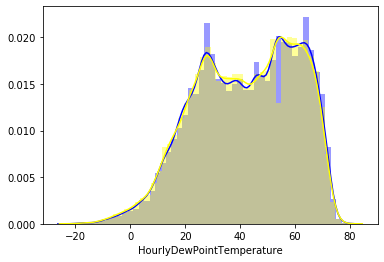

In [21]:
# Doing every single distplot was crashing the runtime so most are commented out
ax1 = sns.distplot(dist_weather['HourlyDewPointTemperature'],color='blue')
ax2 = sns.distplot(df_weather['HourlyDewPointTemperature'],color='yellow')
print(dist_weather['HourlyDewPointTemperature'].isnull().value_counts())
print(df_weather['HourlyDewPointTemperature'].isnull().value_counts())
ax1, ax2;

False    149438
True       4225
Name: HourlyDryBulbTemperature, dtype: int64
False    96327
True        58
Name: HourlyDryBulbTemperature, dtype: int64


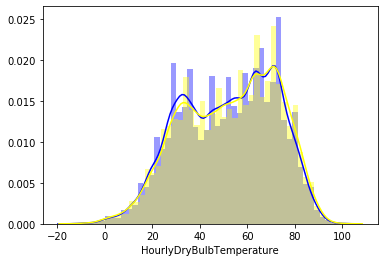

In [22]:
ax1 = sns.distplot(dist_weather['HourlyDryBulbTemperature'],color='blue')
ax2 = sns.distplot(df_weather['HourlyDryBulbTemperature'],color='yellow')
print(dist_weather['HourlyDryBulbTemperature'].isnull().value_counts())
print(df_weather['HourlyDryBulbTemperature'].isnull().value_counts())
ax1, ax2;

In [0]:
# ax1 = sns.distplot(dist_weather['HourlyPrecipitation'],color='blue')
# ax2 = sns.distplot(df_weather['HourlyPrecipitation'],color='yellow')
# print(dist_weather['HourlyPrecipitation'].isnull().value_counts())
# print(df_weather['HourlyPrecipitation'].isnull().value_counts())
# ax1, ax2;

In [0]:
# ax1 = sns.distplot(dist_weather['HourlyRelativeHumidity'],color='blue')
# ax2 = sns.distplot(df_weather['HourlyRelativeHumidity'],color='yellow')
# print(dist_weather['HourlyRelativeHumidity'].isnull().value_counts())
# print(df_weather['HourlyRelativeHumidity'].isnull().value_counts())
# ax1, ax2;

In [0]:
# ax1 = sns.distplot(dist_weather['HourlySeaLevelPressure'],color='blue')
# ax2 = sns.distplot(df_weather['HourlySeaLevelPressure'],color='yellow')
# print(dist_weather['HourlySeaLevelPressure'].isnull().value_counts())
# print(df_weather['HourlySeaLevelPressure'].isnull().value_counts())
# ax1, ax2;

In [0]:
# ax1 = sns.distplot(dist_weather['HourlyStationPressure'],color='blue')
# ax2 = sns.distplot(df_weather['HourlyStationPressure'],color='yellow')
# print(dist_weather['HourlyStationPressure'].isnull().value_counts())
# print(df_weather['HourlyStationPressure'].isnull().value_counts())
# ax1, ax2;

In [0]:
# ax1 = sns.distplot(dist_weather['HourlyVisibility'],color='blue')
# ax2 = sns.distplot(df_weather['HourlyVisibility'],color='yellow')
# print(dist_weather['HourlyVisibility'].isnull().value_counts())
# print(df_weather['HourlyVisibility'].isnull().value_counts())
# ax1, ax2;

In [0]:
# ax1 = sns.distplot(dist_weather['HourlyWindDirection'],color='blue')
# ax2 = sns.distplot(df_weather['HourlyWindDirection'],color='yellow')
# print(dist_weather['HourlyWindDirection'].isnull().value_counts())
# print(df_weather['HourlyWindDirection'].isnull().value_counts())
# ax1, ax2;

In [0]:
# ax1 = sns.distplot(dist_weather['HourlyWindSpeed'],color='blue')
# ax2 = sns.distplot(df_weather['HourlyWindSpeed'],color='yellow')
# print(dist_weather['HourlyWindSpeed'].isnull().value_counts())
# print(df_weather['HourlyWindSpeed'].isnull().value_counts())
# ax1, ax2;

In [0]:
# Are the distributions too different?

# Should I have resampled/interpolated in a different way?

# Could the differences be explained by the fact that there are now less 
# observations after resampling and I am only seeing a difference of 
# percentages rather than a difference in information?

## Create function to add year, month, day, and season variables

In [0]:
# Create year, month, day, and season variables
def add_time(df):
  df = df.copy()
  df['year'] = df.index.year
  df['month'] = df.index.month
  df['date'] = df.index.dayofyear
  df['timestamp'] = df.index.time
  df['season'] = (df.index.month%12 + 3)//3
  df['season'] = df['season'].replace({1:'winter',
                                      2:'spring',
                                      3:'summer',
                                      4:'fall'})
  return df

In [0]:
df_weather = add_time(df_weather)

In [33]:
df_weather.shape
# The shape is wrong

(96385, 14)

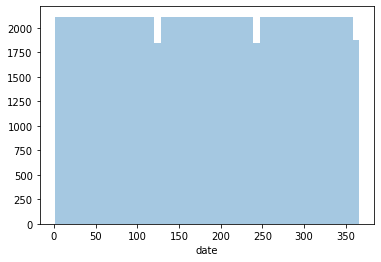

In [34]:
# Check out the distribution of the dates
sns.distplot(df_weather['date'],kde=False);
# Missing some...might be a problem when using lagged variables

# Import daily temperature data

In [35]:
df_daily_temp = pd.read_csv('https://github.com/cjakuc/DS-Unit1-Build-Week/raw/master/Weather%20Data/dayton_daily_temp.csv',
                             parse_dates=True,
                             index_col=0)
df_daily_temp = add_time(df_daily_temp)
df_daily_temp.head()

,DailyAvgAirTemp,DailyCoolingDegreeDays,DailyHeatingDegreeDays,year,month,date,timestamp,season
2005-01-01,48.0,0.0,17.0,2005,1,1,00:00:00,winter
2005-01-02,52.0,0.0,13.0,2005,1,2,00:00:00,winter
2005-01-03,50.0,0.0,15.0,2005,1,3,00:00:00,winter
2005-01-04,40.0,0.0,25.0,2005,1,4,00:00:00,winter
2005-01-05,36.0,0.0,29.0,2005,1,5,00:00:00,winter


# Energy data

In [36]:
# Import energy data
df_energy = pd.read_csv('https://github.com/cjakuc/DS-Unit1-Build-Week/blob/master/Energy%20Data/pjm_dayton_clean.csv?raw=true',
                        parse_dates=True,
                        index_col=0)
df_energy = add_time(df_energy)
print(df_energy.shape, df_energy.head())
# The shape is wrong

(96341, 6)                          MW  year  month  date timestamp  season
Datetime                                                        
2005-01-01 00:00:00  1560.0  2005      1     1  00:00:00  winter
2005-12-31 01:00:00  1706.0  2005     12   365  01:00:00  winter
2005-12-31 02:00:00  1630.0  2005     12   365  02:00:00  winter
2005-12-31 03:00:00  1586.0  2005     12   365  03:00:00  winter
2005-12-31 04:00:00  1569.0  2005     12   365  04:00:00  winter


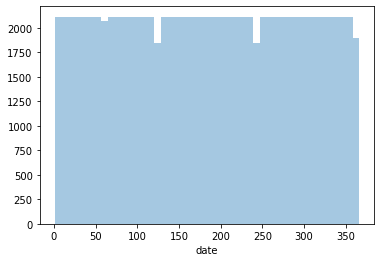

In [37]:
# Check out the distribution of the dates
sns.distplot(df_energy['date'],kde=False);
# Missing some...might be a problem when using lagged variables

# Combine all the datasets

In [38]:
df_full = pd.merge(df_weather,df_energy,
                   on=['year','month','date','timestamp','season'],
                   left_index=True,
                   right_index=True)
df_full.shape
# Less observations than both

(96318, 15)

In [39]:
df_full.head()

,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlyPrecipitation,HourlyRelativeHumidity,HourlySeaLevelPressure,HourlyStationPressure,HourlyVisibility,HourlyWindDirection,HourlyWindSpeed,year,month,date,timestamp,season,MW
2005-01-01 00:00:00,50.000000,50.000000,0.0,100.0,30.300,29.215000,1.500,225.000000,11.500000,2005,1,1,00:00:00,winter,1560.0
2005-01-01 01:00:00,50.833333,50.833333,0.0,100.0,30.305,29.223333,1.415,226.666667,8.666667,2005,1,1,01:00:00,winter,1490.0
2005-01-01 02:00:00,50.000000,50.000000,0.0,100.0,30.320,29.240000,0.250,200.000000,6.000000,2005,1,1,02:00:00,winter,1429.0
2005-01-01 03:00:00,50.000000,50.000000,0.0,100.0,30.340,29.250000,0.250,200.000000,3.000000,2005,1,1,03:00:00,winter,1367.0
2005-01-01 04:00:00,50.000000,50.000000,0.0,100.0,30.340,29.255000,0.250,100.000000,1.500000,2005,1,1,04:00:00,winter,1325.0


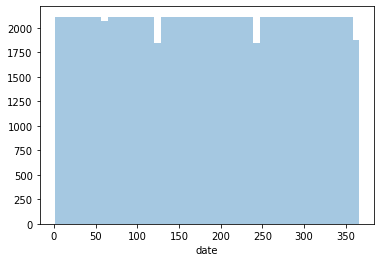

In [40]:
# Check out the distribution of the dates
sns.distplot(df_full['date'],kde=False);

In [41]:
# Merge in the daily temperature df
df_temp = pd.merge(df_full,df_daily_temp,
                   on=['year','month','date','timestamp','season'],
                   left_index=True,
                   right_index=True,
                   how='left')
df_temp.shape

(96318, 18)

In [42]:
df_temp.head()
# Need to make it so the daily metrics don't have any NaNs,
# so the values show up for each hour in the day

,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlyPrecipitation,HourlyRelativeHumidity,HourlySeaLevelPressure,HourlyStationPressure,HourlyVisibility,HourlyWindDirection,HourlyWindSpeed,year,month,date,timestamp,season,MW,DailyAvgAirTemp,DailyCoolingDegreeDays,DailyHeatingDegreeDays
2005-01-01 00:00:00,50.000000,50.000000,0.0,100.0,30.300,29.215000,1.500,225.000000,11.500000,2005,1,1,00:00:00,winter,1560.0,48.0,0.0,17.0
2005-01-01 01:00:00,50.833333,50.833333,0.0,100.0,30.305,29.223333,1.415,226.666667,8.666667,2005,1,1,01:00:00,winter,1490.0,NaN,NaN,NaN
2005-01-01 02:00:00,50.000000,50.000000,0.0,100.0,30.320,29.240000,0.250,200.000000,6.000000,2005,1,1,02:00:00,winter,1429.0,NaN,NaN,NaN
2005-01-01 03:00:00,50.000000,50.000000,0.0,100.0,30.340,29.250000,0.250,200.000000,3.000000,2005,1,1,03:00:00,winter,1367.0,NaN,NaN,NaN
2005-01-01 04:00:00,50.000000,50.000000,0.0,100.0,30.340,29.255000,0.250,100.000000,1.500000,2005,1,1,04:00:00,winter,1325.0,NaN,NaN,NaN


# Choose your target. Which column in your tabular dataset will you predict?

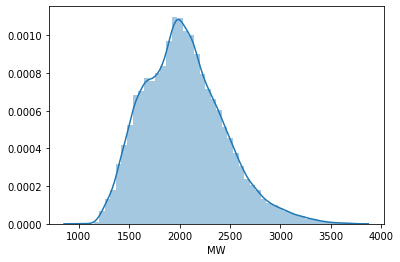

In [43]:
target = 'MW'
sns.distplot(df_full[target]);
# Slightly right skewed?

# Is your problem regression or classification?

Regression

# Choose your evaluation metric(s).
    - Regression: Will you use mean absolute error, root mean squared error, R^2, or other regression metrics?

MAE

# Choose which observations you will use to train, validate, and test your model.
    - Are some observations outliers? Will you exclude them?
    - Will you do a random split or a time-based split?

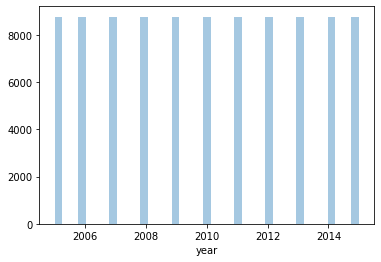

In [44]:
sns.distplot(df_full['year'],kde=False);
# Looks like all the years are distributed equally so I will choose
# based on year

In [45]:
df_full['year'].sort_values(ascending=False)
# The last year is 2015
# 2015 will be the test
# 2014 will be the validation

2015-12-31 00:00:00    2015
2015-05-02 06:00:00    2015
2015-05-02 12:00:00    2015
2015-05-02 11:00:00    2015
2015-05-02 10:00:00    2015
                       ... 
2005-09-01 13:00:00    2005
2005-09-01 14:00:00    2005
2005-09-01 15:00:00    2005
2005-09-01 16:00:00    2005
2005-01-01 00:00:00    2005
Name: year, Length: 96318, dtype: int64

In [0]:
# Create train, val, and test sets
train = df_full[df_full['year']<2014]
val = df_full[df_full['year']==2014]
test = df_full[df_full['year']==2015]

In [47]:
print(train.shape,val.shape,test.shape)
print(train.head(),val.head(),test.head())

(78821, 15) (8760, 15) (8737, 15)
                     HourlyDewPointTemperature  ...      MW
2005-01-01 00:00:00                  50.000000  ...  1560.0
2005-01-01 01:00:00                  50.833333  ...  1490.0
2005-01-01 02:00:00                  50.000000  ...  1429.0
2005-01-01 03:00:00                  50.000000  ...  1367.0
2005-01-01 04:00:00                  50.000000  ...  1325.0

[5 rows x 15 columns]                      HourlyDewPointTemperature  ...      MW
2014-01-01 00:00:00                       19.0  ...  1879.0
2014-01-01 01:00:00                       19.0  ...  1819.0
2014-01-01 02:00:00                       19.0  ...  1797.0
2014-01-01 03:00:00                       18.0  ...  1765.0
2014-01-01 04:00:00                       18.5  ...  1754.0

[5 rows x 15 columns]                      HourlyDewPointTemperature  ...      MW
2015-01-01 00:00:00                        7.0  ...  2001.0
2015-01-01 01:00:00                        7.5  ...  1950.0
2015-01-01 02:00:00 